# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
headers = [header.get_text(strip = True) for header in rows[0].find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    # Extract each cell in the row
    cells = row.find_all('td')
    # Get the text content of each cell
    cell_data = [cell.get_text(strip=True) for cell in cells]
    # Create a dictionary for the row data
    row_dict = dict(zip(headers, cell_data))
    # Add the dictionary to the data list
    data.append(row_dict)

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [14]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [21]:
# Change data types for data analysis
# convert date to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# convert sol to int
df.sol = df.sol.astype(int)

# convert ls to int
df.ls = df.ls.astype(int)

# convert month to int
df.month = df.month.astype(int)

# convert min_temp to float
df.min_temp = df.min_temp.astype(float)

# convert pressure to float
df.pressure = df.pressure.astype(float)

In [24]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [53]:
# 1. How many months are there on Mars?
month_count = df.groupby('month').size()

month_count

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [45]:
# 2. How many Martian days' worth of data are there?
martian_days = df['month'].count()

martian_days

1867

In [51]:
# 3. What is the average low temperature by month?
months = df.groupby('month').mean(numeric_only = True)
avg_min_temp = months['min_temp']

avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

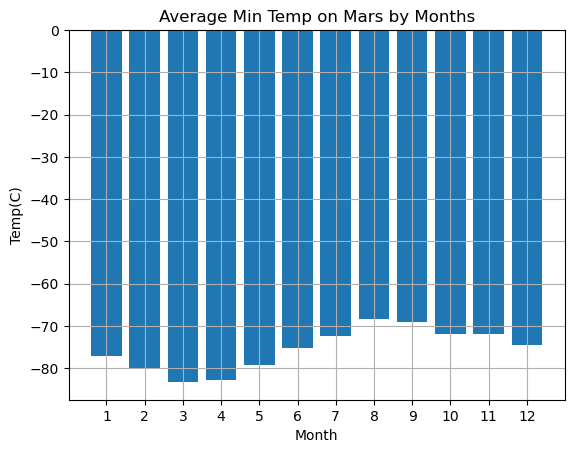

In [73]:
# Plot the average temperature by month
plt.figure
plt.bar(x=avg_min_temp.index, height = avg_min_temp)
plt.title('Average Min Temp on Mars by Months')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Month')
plt.ylabel('Temp(C)')
plt.grid(True)
plt.show()

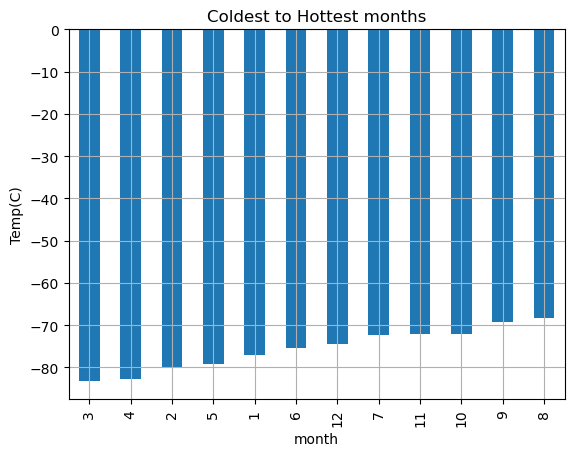

In [71]:
# Identify the coldest and hottest months in Curiosity's location
# sort min_temp values
temp_asc = avg_min_temp.sort_values()

# Plot temp_asc
plt.figure
temp_asc.plot.bar()
plt.title('Coldest to Hottest months')
plt.ylabel('Temp(C)')
plt.grid(True)
plt.show()

Taking the average minimum tempature and sorting the values, the 3rd month on Mars followed closely by the 4th month is the coldest. On average, the warmest month on Mars is the  8th month. 

In [67]:
# 4. Average pressure by Martian month
avg_pressure = months['pressure']

avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

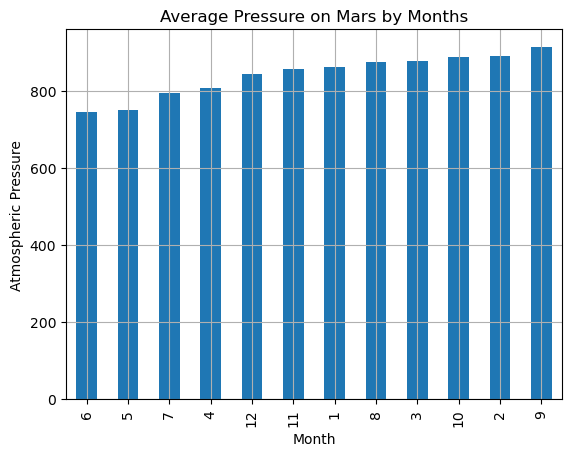

In [95]:
# Sort values from lowest to highest pessure
pressure_asc = avg_pressure.sort_values()

# Plot the average pressure by month
plt.figure
pressure_asc.plot.bar()
plt.title('Average Pressure on Mars by Months')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.grid(True)
plt.show()

On Mars, the average atmospheric pressure is greatest in the 9th month and lowest on the 6th month. 


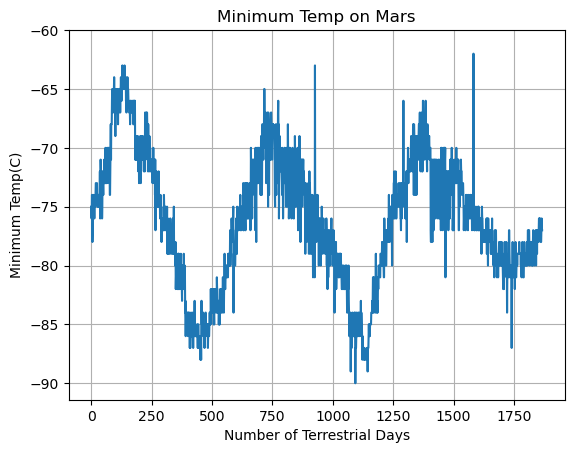

In [92]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure
df['min_temp'].plot(x='month', y = 'min_temp')
plt.title('Minimum Temp on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temp(C)')
plt.grid(True)
plt.ylim(top = -60)
plt.show()

 The minimum tempature graph shows the days on the x-axis and tempatures on the y-axis. Tempatures change based on how close the planet is to the sun, based on the distance from the coldest points around Day 475 and Day 1125 it can be assumed that would be a full cycle around the sun when Mars is at the furthest point around 650 days. To confirm this, a quick internet search shows a year on Mars is around 687 days on Earth. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [96]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', encoding='utf-8')

In [97]:
browser.quit()